In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)

In [3]:
y_xor = np.where(y_xor, 1, -1)

In [5]:
x_xor[y_xor ==1, 0]

array([ 1.86755799,  0.95008842, -0.10321885,  1.49407907,  0.3130677 ,
       -2.55298982,  0.8644362 ,  2.26975462,  0.04575852, -0.34791215,
       -1.70627019, -1.25279536, -0.89546656, -0.02818223,  0.17742614,
       -1.63019835, -0.90729836,  1.13940068,  0.40234164, -0.31155253,
       -1.16514984,  0.46566244,  1.17877957, -1.07075262, -0.40317695,
        1.8831507 , -1.270485  , -1.17312341, -0.86122569, -0.26800337,
        0.94725197,  0.37642553, -0.43515355, -0.76991607, -0.67433266,
       -0.63584608,  0.57659082,  0.39600671, -1.49125759, -0.91282223,
       -0.06824161,  1.12663592, -0.49803245, -1.22543552,  0.85683061,
       -1.03424284, -0.4555325 ,  0.62523145, -1.10438334, -0.739563  ,
       -1.29285691,  0.52327666,  0.64013153,  0.2799246 ,  0.78632796,
       -0.01702041,  2.25930895, -0.46359597, -1.54079701, -0.54286148,
       -1.15618243,  1.49448454,  0.52106488,  0.14195316, -1.5829384 ,
       -1.93627981, -0.31088617,  0.39904635,  0.49374178, -2.03

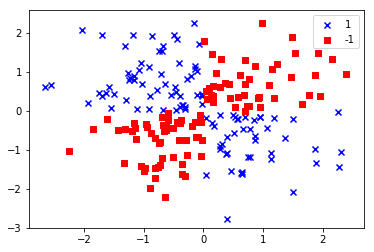

In [19]:
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [43]:
from matplotlib.colors import ListedColormap

def plot_dicision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot dicision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plt all samples
    x_test, y_test = x[test_idx, :], y[test_idx]
    for  idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    #highlight test samples
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [44]:
from sklearn.svm import SVC

In [52]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(x_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
svm.predict(x_xor)

array([-1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


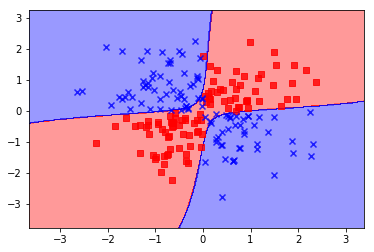

In [46]:
plot_dicision_regions(x_xor, y_xor, svm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


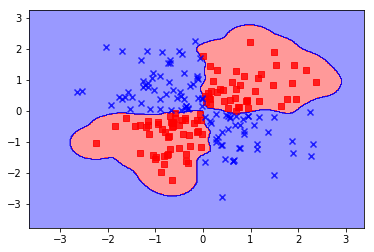

In [51]:
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=10.0) #gamma決策邊界
svm.fit(x_xor, y_xor)
plot_dicision_regions(x_xor, y_xor, svm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


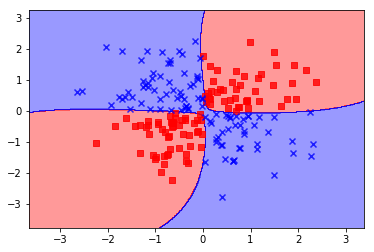

In [50]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.20, C=1000.0) #C錯誤懲罰項
svm.fit(x_xor, y_xor)
plot_dicision_regions(x_xor, y_xor, svm)